DPLL algorithm

psseudo code:
```java
dpll(F,literal){
    remove clauses containing the literal
    if (F contains no clause){
        return true;
    }
    shorten clauses containing ¬literal
    if (F contains empty clause){
        return false;
    }
    if (F contains a unit or pure L){
        return dpll(F,L);
    }
    choose V in F;
    if (dpll(F,¬V)){
        return true;
    }
    return dpll(F,V);
}
```

In [ ]:
from collections import defaultdict
def pure(clauset:list[set[str]],literals:set[str]):
    pureset = set()
    for literal in literals:
        lit = str()
        cl = set()
        for clause in clauset:
            if literal in clause:
                lit = literal
                cl = clause
                break
            elif '~'+literal in clause:
                lit = '~'+literal
                cl = clause
                break
        flag = True
        neglit = '~'+lit if lit[0]!='~' else lit[1:]

        clauset.remove(cl)
        for clause in clauset:
            if neglit in clause:
                flag=False
        clauset.append(cl)
        if flag:
            pureset.add(lit)
    return pureset




def dpll(clauset:list[set[str]],literal:str,assignment:defaultdict[str,bool],pureset:set[str],literals):
    # removing clauses containing the literal
    for clause in clauset:
        if literal in clause:
            clauset.remove(clause)

    #if set of clauses becomes empty then we get true
    if len(clauset)==0:
        return True

    # shortening of the clauses containing negative of literal
    neglit = '~'+literal if literal[0]!='~' else literal[1:]
    for clause in clauset:
        if neglit in clause:
            clause.remove(neglit)

    # if we get one empty clause then return false
    if {} in clauset:
        return False

    # if we get a unit clause we run dpll for it
    for clause in clauset:
        if len(clause)==1:
            lit = clause.pop()
            if lit[0]=='~':
                assignment[lit[1:]] = False
                literals.remove(lit[1:])
            else:
                assignment[lit]=True
                literals.remove(lit)
            dpll(clauset,lit,assignment,pureset,literals)

    # pure literal passing
    if len(pureset)!=0:
        lit = pureset.pop()
        if lit[0]=='~':
            assignment[lit[1:]] = False
            literals.remove(lit[1:])
        else:
            assignment[lit]=True
            literals.remove(lit)
        dpll(clauset,lit,assignment,pureset,literals)

    # if neither pure nor unit literal remains then randomly pick a literal and use it
    v = literals.pop()
    assignment[v]=False
    if dpll(clauset,'~'+v,assignment,pureset,literals):
        return True
    assignment[v] = True
    return dpll(clauset,v,assignment,pureset,literals)

In [ ]:

if __name__=="__main__":
    # {{a ¬b c}{¬c d ¬e}{¬a ¬b e}{d b}{e a ¬c}}
    clauset = [{'a','~b','c'},{'~c','d','~e'},{'~a','~b','e'},{'d','b'},{'e','a','~c'}]
    literals = {'a','b','c','d','e'}
    assignment = defaultdict(bool)
    pureset = pure(clauset,literals)
    literal = pureset.pop()
    print(dpll(clauset,literal,assignment,pureset,literals))
    print(assignment)




True
defaultdict(<class 'bool'>, {'d': False, 'c': False, 'e': False, 'b': False, 'a': False})


# Birthday paradox

formula used P(n) = probability of atleast two children have same birthdate from n children = 1-$\frac{^{365}P_{n}}{365^n}$

In [ ]:
#imports
import math
import matplotlib.pyplot as plt
from typing import *

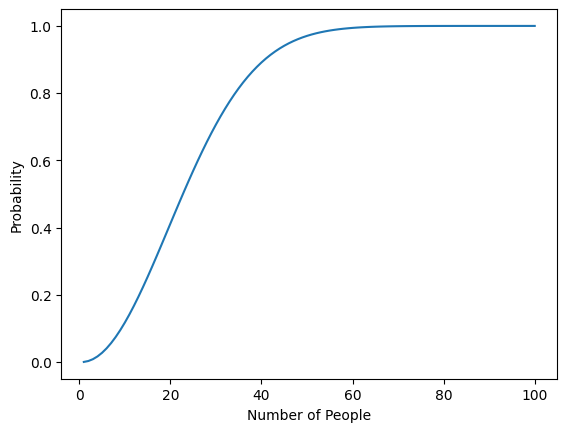

In [ ]:
def plotgraph(start: int, end: int) -> None:
    prob: Callable[[int], float] = lambda n: 1-(math.perm(365, n) / math.pow(365, n))
    x_values = list(range(start, end + 1))
    y_values = [prob(i) for i in x_values]
    plt.plot(x_values, y_values)
    plt.xlabel('Number of People')
    plt.ylabel('Probability')

plotgraph(1, 100)